# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands
## T cells

In [2]:
# ! python3 -m  pip uninstall -y plotly kaleido

In [3]:
# ! python3 -m  pip install --upgrade plotly kaleido


Modify the window of the input size

In [1]:
import sys
from pathlib import Path
from datetime import datetime

import plotly.io as pio
pio.renderers.default = "vscode"


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract 30 bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using P2 on 2024-12-16

## Setting mC threshold in methylation calling confidance to 0.7

In [3]:
system_info()

experiment_name = "unedited_T_primerES_nCATS"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'
region_start = 206586162
region_end = 206586192
region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30


No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 2925 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2925   0% | 00:00<…

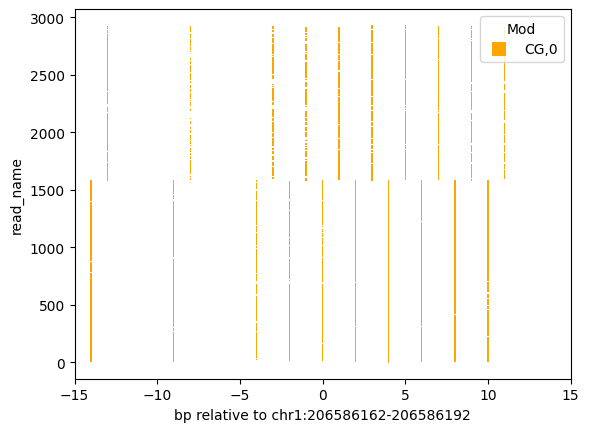

Error processing extracted reads: name 'h5py' is not defined
Error in visualization: 'NoneType' object is not subscriptable
Error creating padded reads matrix: 'NoneType' object is not subscriptable


In [4]:
extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

In [5]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


Error loading padded reads: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-26.npy'
Error in process pipeline: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-26.npy'
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-26.npy'


### Results for ROI Extraction from Unedited T cells:
From around 3000 reads located near the ROI, 

only ~1700 reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads: 1081 

Reverse reads: 662

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 7644 from reads.CG,0.txt into reads.combined_basemods.h5, new size 7644   0% | 00:00<…

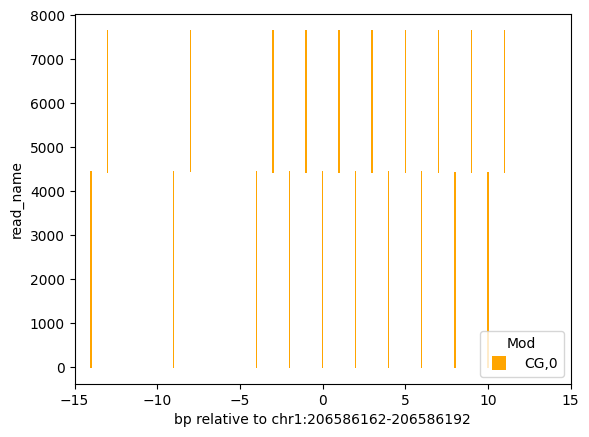

Error processing extracted reads: name 'h5py' is not defined
Error in visualization: 'NoneType' object is not subscriptable
Error creating padded reads matrix: 'NoneType' object is not subscriptable


In [6]:

# def main():
#     """Main function to execute all tasks."""
system_info()

experiment_name = "silenced_T_primerES_nCATS"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

In [8]:
save_padded_reads_name_np

'padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy'

Padded reads loaded successfully.


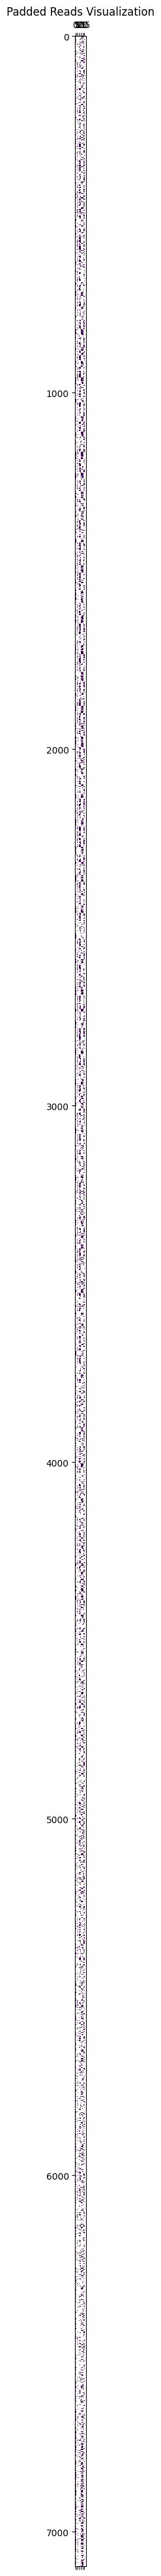

Visualization completed.
Region length: 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [1, 6, 11, 13, 15, 17, 19, 21, 23, 25]
Forward reads: 4132
Reverse reads: 2965
DataFrame shape: (7097, 30)
         C       C       G    C    C    C       C      G    A    G  ...  \
count  0.0  1963.0  1609.0  0.0  0.0  0.0  1604.0  578.0  0.0  0.0  ...   
mean   NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   
std    NaN     0.0     0.0  NaN  NaN  NaN     0.0    0.0  NaN  NaN  ...   
min    NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   
25%    NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   
50%    NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   
75%    NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   
max    NaN     1.0     1.0  NaN  NaN  NaN     1.0    1.0  NaN  NaN  ...   

            G       C       G       C       G       C       G

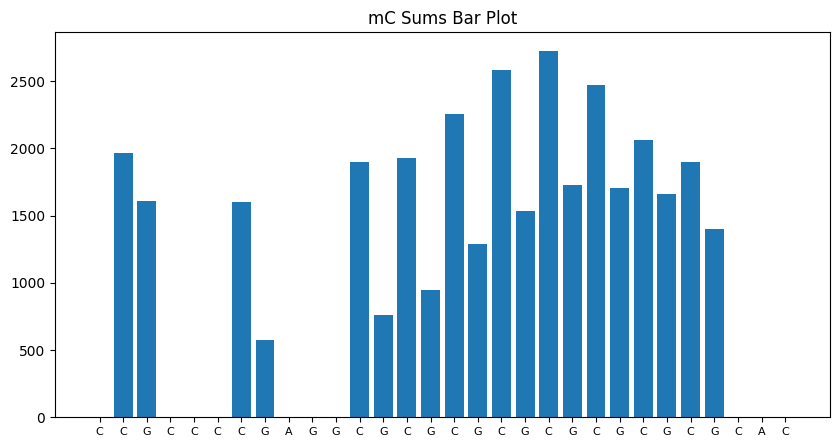

(mC_sums  = [   0. 1963. 1609.    0.    0.    0. 1604.  578.    0.    0.    0. 1901.
  761. 1926.  943. 2258. 1291. 2585. 1532. 2726. 1729. 2474. 1705. 2061.
 1661. 1895. 1399.    0.    0.    0.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence  mC Sums
0       0                  C      0.0
1       1                  C   1963.0
2       2                  G   1609.0
3       3                  C      0.0
4       4                  C      0.0
5       5                  C      0.0
6       6                  C   1604.0
7       7                  G    578.0
8       8                  A      0.0
9       9                  G      0.0
10     10                  G      0.0
11     11                  C   1901.0
12     12                  G    761.0
13     13                  C   1926.0
14     14                  G    943.0
15     15      

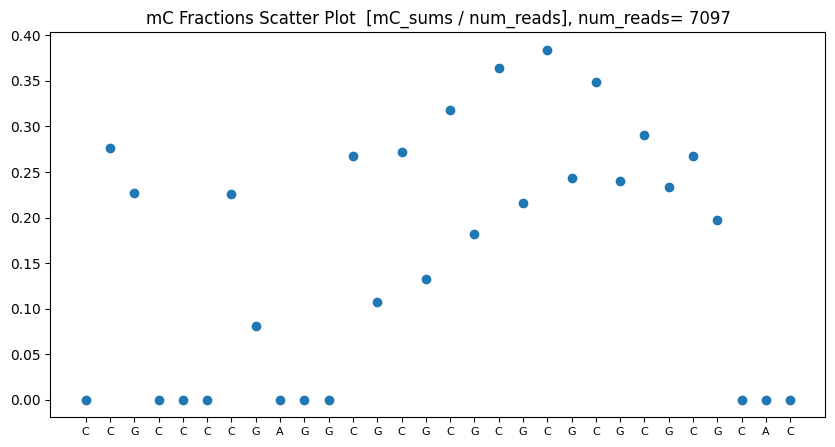

(mC_sums / len(CGs_all) = [0.         0.27659574 0.22671551 0.         0.         0.
 0.22601099 0.08144286 0.         0.         0.         0.26785966
 0.10722841 0.27138227 0.13287304 0.3181626  0.18190785 0.36423841
 0.21586586 0.38410596 0.24362407 0.348598   0.24024236 0.2904044
 0.23404255 0.26701423 0.19712555 0.         0.         0.        ]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence   mC Sums
0       0                  C  0.000000
1       1                  C  0.276596
2       2                  G  0.226716
3       3                  C  0.000000
4       4                  C  0.000000
5       5                  C  0.000000
6       6                  C  0.226011
7       7                  G  0.081443
8       8                  A  0.000000
9       9                  G  0.000000
10     10                  G  0.00000

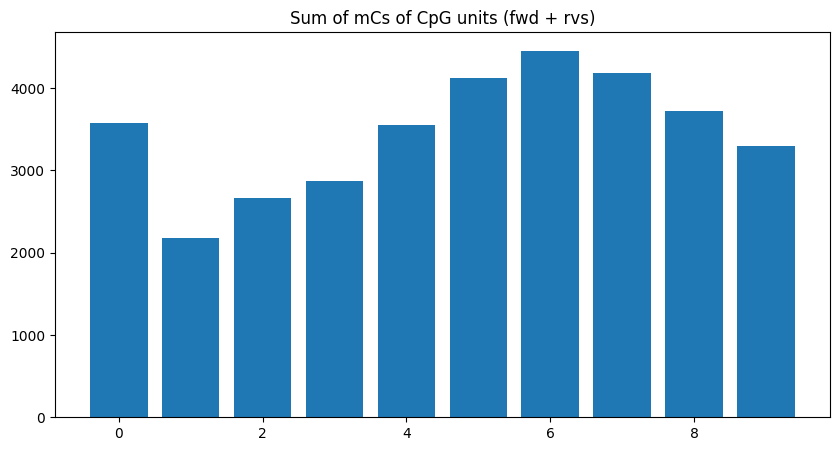

CGs_all_sums  = [3572. 2182. 2662. 2869. 3549. 4117. 4455. 4179. 3722. 3294.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (10, 3)
In plot_mC_sums_bar DataFrame:    Index Reference Sequence  mC Sums
0      0               CG_1   3572.0
1      1               CG_2   2182.0
2      2               CG_3   2662.0
3      3               CG_4   2869.0
4      4               CG_5   3549.0
5      5               CG_6   4117.0
6      6               CG_7   4455.0
7      7               CG_8   4179.0
8      8               CG_9   3722.0
9      9              CG_10   3294.0
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


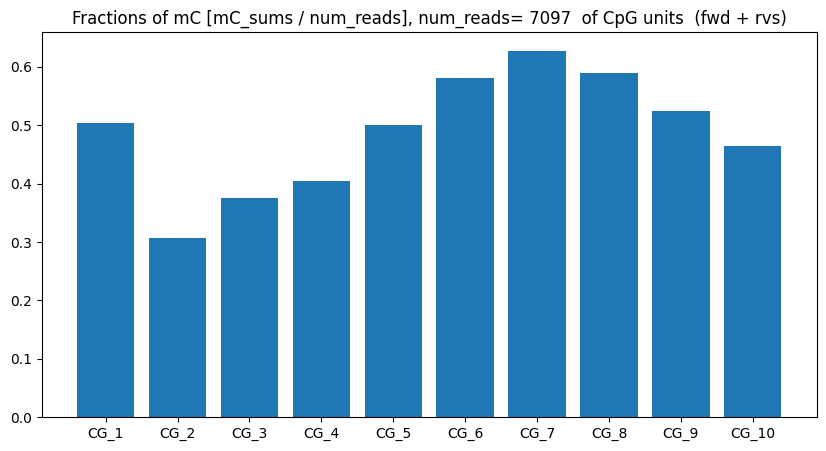

CGs_all_sums / len(CGs_all) = [0.50331126 0.30745385 0.37508807 0.40425532 0.50007045 0.58010427
 0.62773003 0.58884036 0.52444695 0.46413978]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (10, 3)
In plot_mC_sums_bar DataFrame:    Index Reference Sequence   mC Sums
0      0               CG_1  0.503311
1      1               CG_2  0.307454
2      2               CG_3  0.375088
3      3               CG_4  0.404255
4      4               CG_5  0.500070
5      5               CG_6  0.580104
6      6               CG_7  0.627730
7      7               CG_8  0.588840
8      8               CG_9  0.524447
9      9              CG_10  0.464140
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


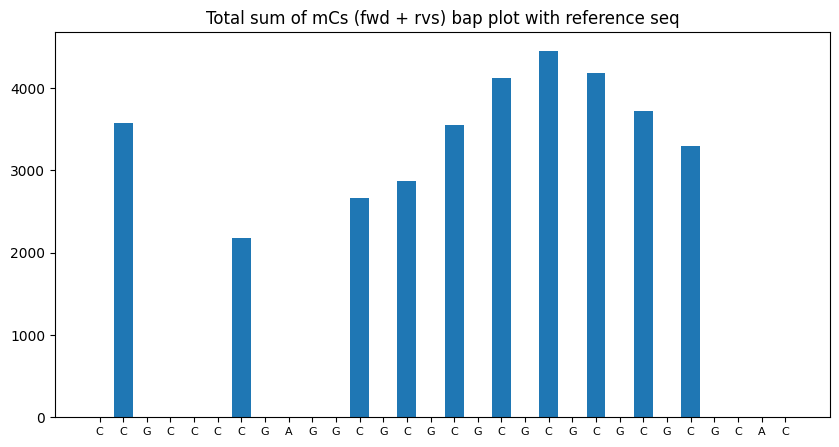

CGs_all_on_fwd_C_sums = [   0. 3572.    0.    0.    0.    0. 2182.    0.    0.    0.    0. 2662.
    0. 2869.    0. 3549.    0. 4117.    0. 4455.    0. 4179.    0. 3722.
    0. 3294.    0.    0.    0.    0.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence  mC Sums
0       0                  C      0.0
1       1                  C   3572.0
2       2                  G      0.0
3       3                  C      0.0
4       4                  C      0.0
5       5                  C      0.0
6       6                  C   2182.0
7       7                  G      0.0
8       8                  A      0.0
9       9                  G      0.0
10     10                  G      0.0
11     11                  C   2662.0
12     12                  G      0.0
13     13                  C   2869.0
14     14                  G      0.0
15 

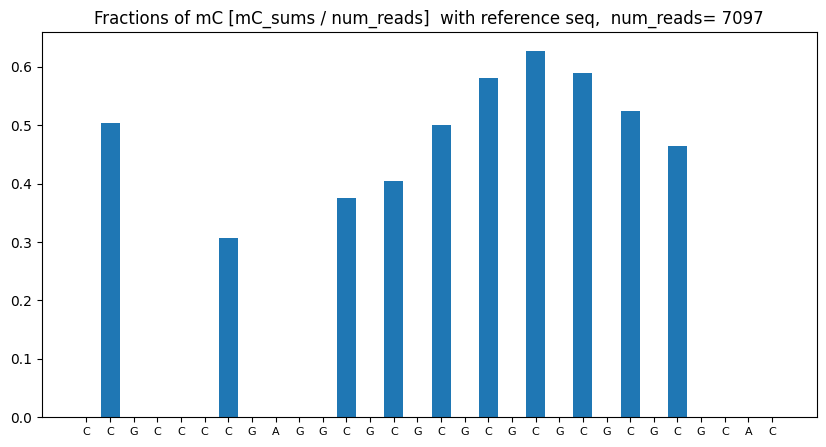

CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.50331126 0.         0.         0.         0.
 0.30745385 0.         0.         0.         0.         0.37508807
 0.         0.40425532 0.         0.50007045 0.         0.58010427
 0.         0.62773003 0.         0.58884036 0.         0.52444695
 0.         0.46413978 0.         0.         0.         0.        ]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence   mC Sums
0       0                  C  0.000000
1       1                  C  0.503311
2       2                  G  0.000000
3       3                  C  0.000000
4       4                  C  0.000000
5       5                  C  0.000000
6       6                  C  0.307454
7       7                  G  0.000000
8       8                  A  0.000000
9       9                  G  0.000000
10     10              

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



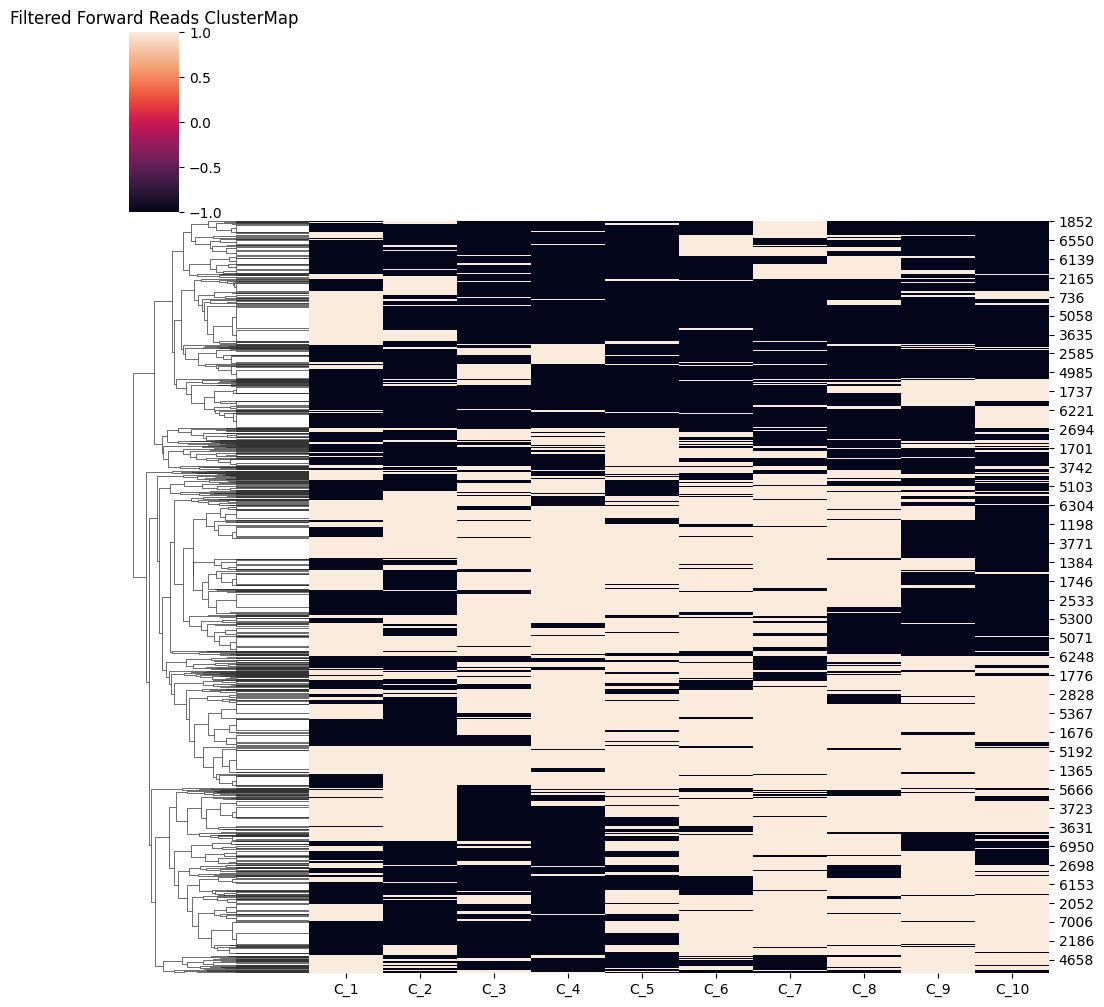

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



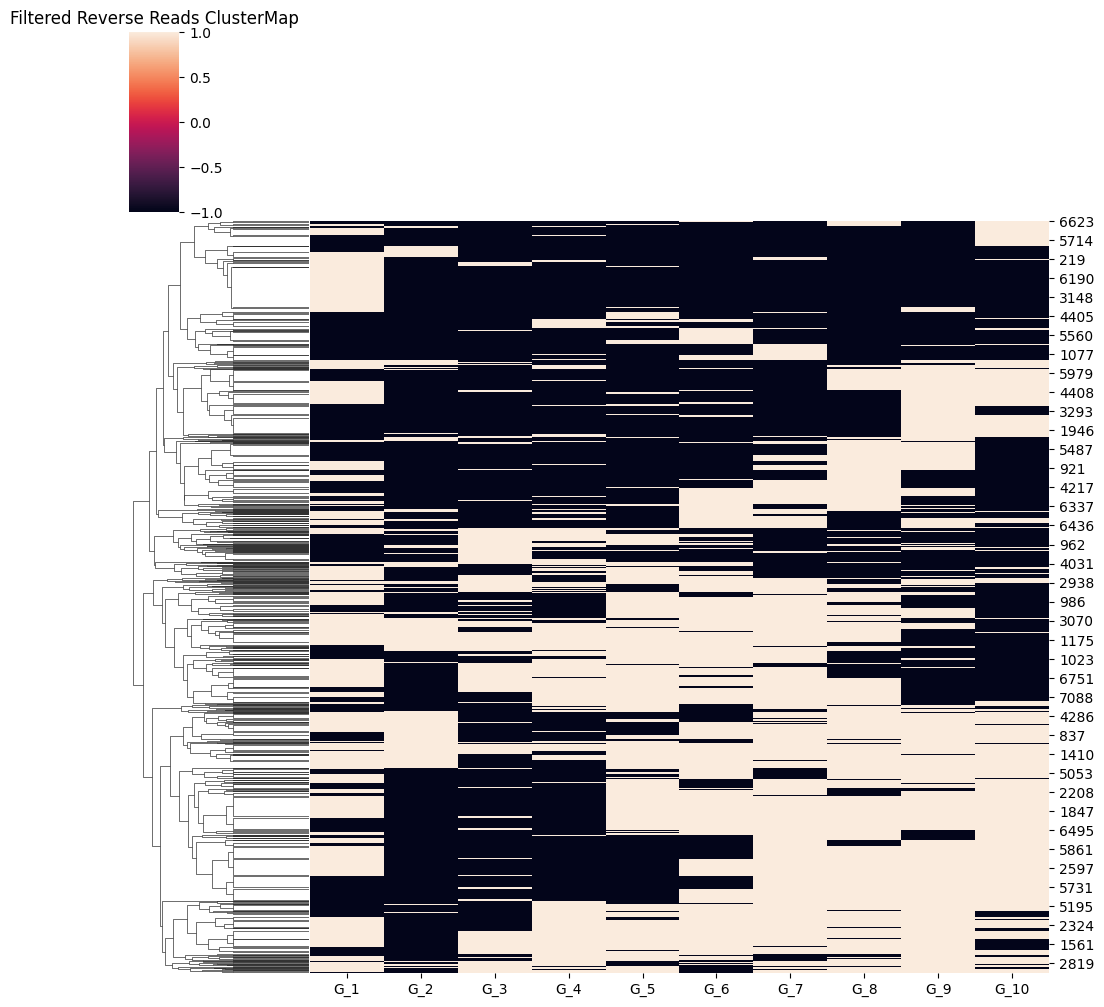

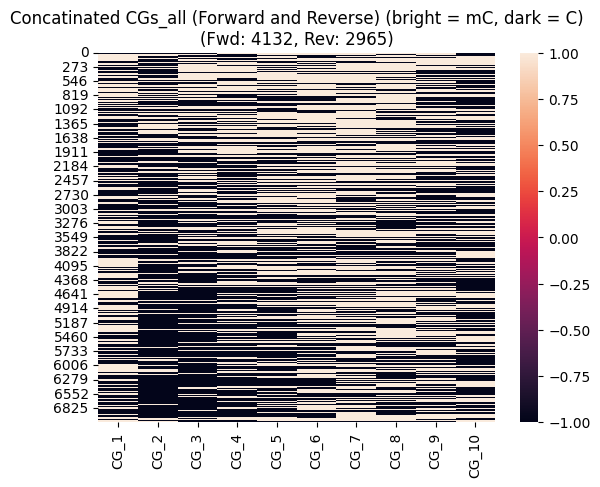

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



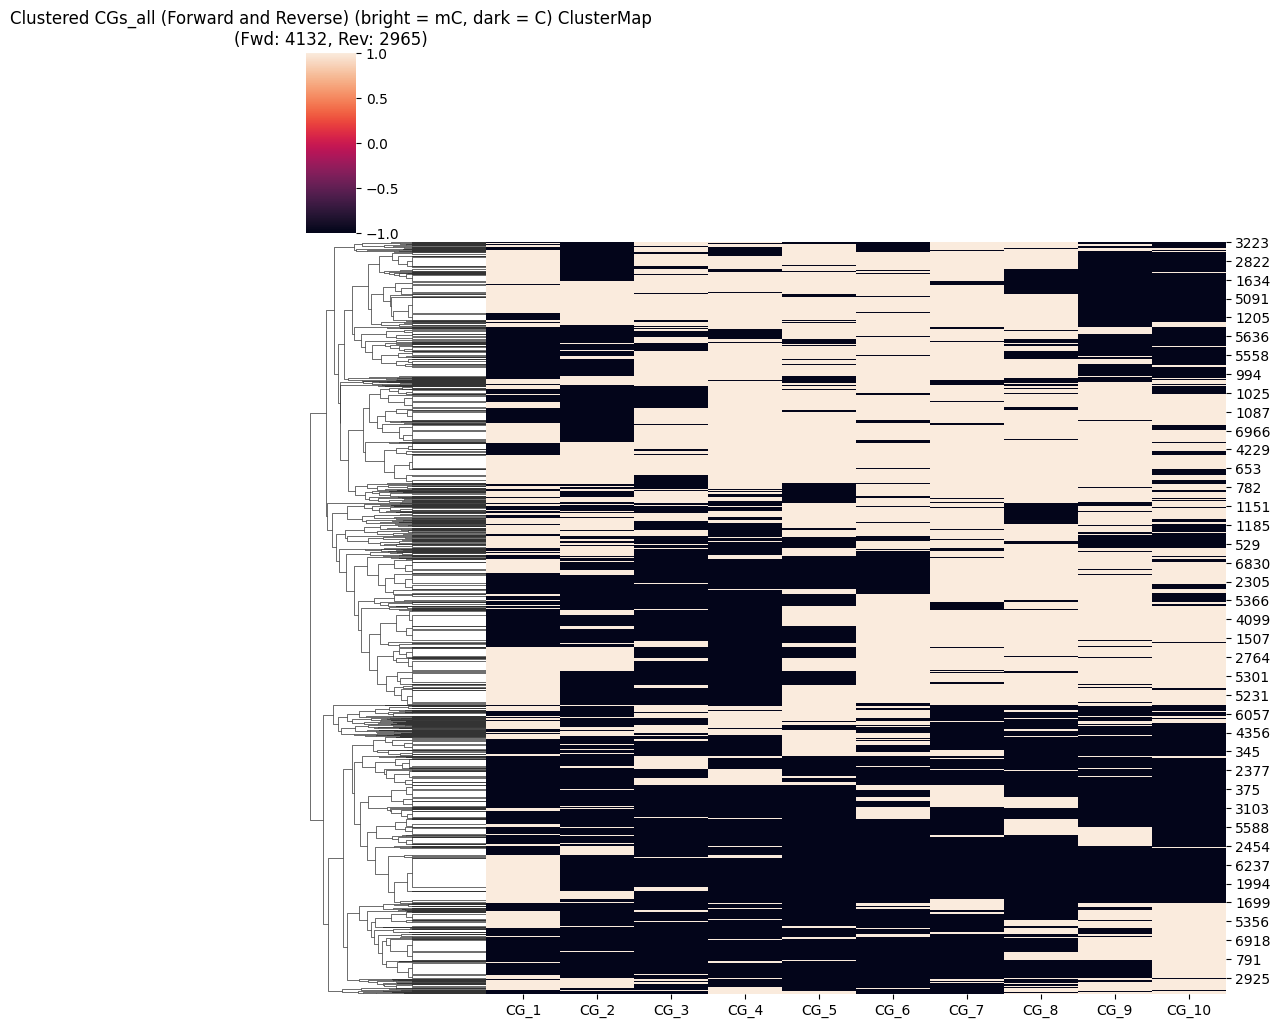

CGs_all saved as CG_10_units_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [9]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced CRISPROff primary T cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads: 4132

Reverse reads: 2965


# Change the mC threshold to 0.9 - only keep very confident mC values


## T unedited cells

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 3574 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3574   0% | 00:00<…

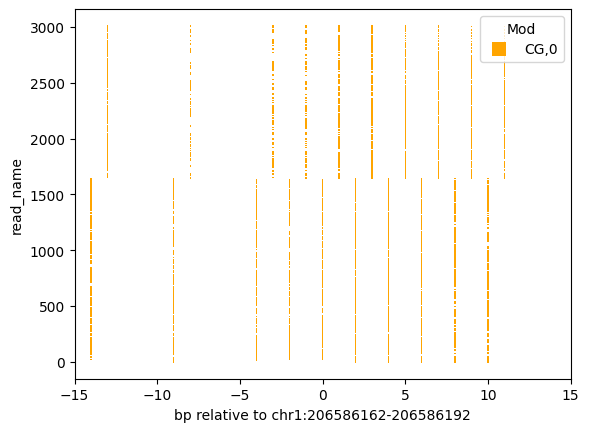

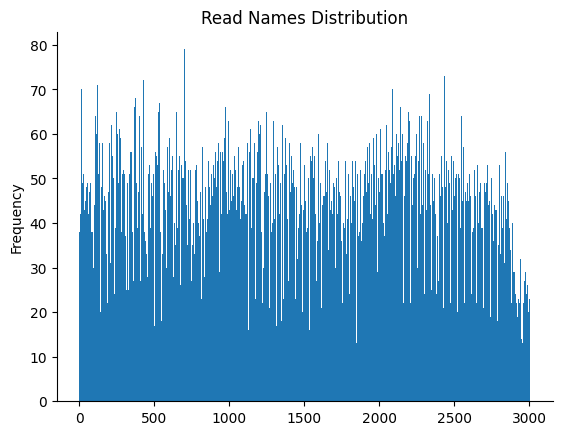

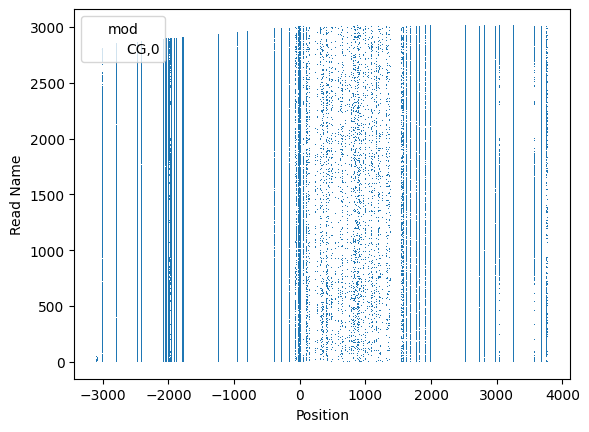

Error creating padded reads matrix: index -2988 is out of bounds for axis 1 with size 30


In [10]:
system_info()

experiment_name = "unedited_T_primerES_nCATS"
threshold_mC =  0.9  # 0.7 # #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'
region_start = 206586162
region_end = 206586192
region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


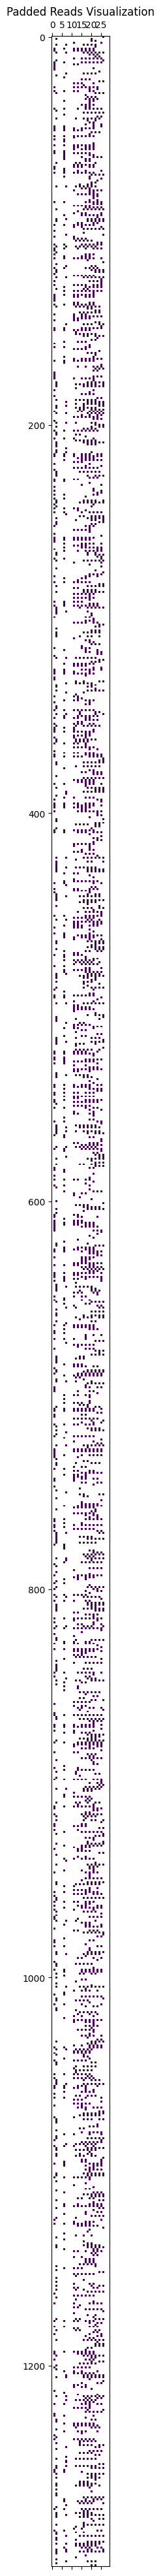

Visualization completed.
Region length: 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [1, 6, 11, 13, 15, 17, 19, 21, 23, 25]
Forward reads: 788
Reverse reads: 516
DataFrame shape: (1304, 30)
         C      C      G    C    C    C      C     G    A    G  ...      G  \
count  0.0  272.0  286.0  0.0  0.0  0.0  249.0  76.0  0.0  0.0  ...  251.0   
mean   NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   
std    NaN    0.0    0.0  NaN  NaN  NaN    0.0   0.0  NaN  NaN  ...    0.0   
min    NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   
25%    NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   
50%    NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   
75%    NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   
max    NaN    1.0    1.0  NaN  NaN  NaN    1.0   1.0  NaN  NaN  ...    1.0   

           C      G      C      G   

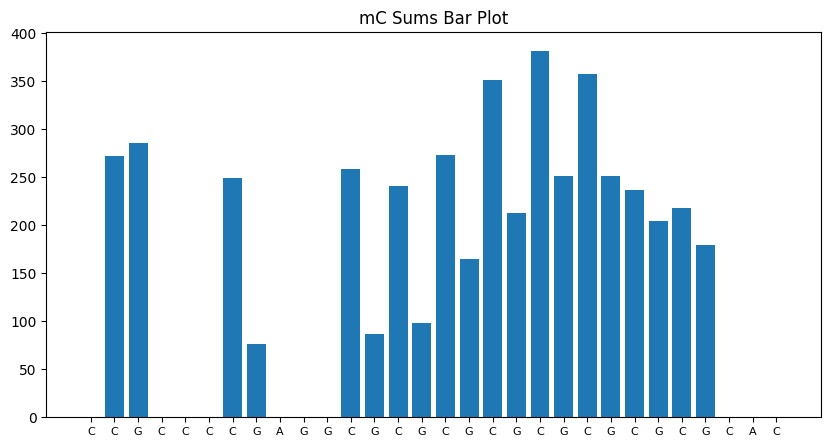

(mC_sums  = [  0. 272. 286.   0.   0.   0. 249.  76.   0.   0.   0. 259.  87. 241.
  98. 273. 165. 351. 213. 382. 251. 358. 251. 237. 204. 218. 179.   0.
   0.   0.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence  mC Sums
0       0                  C      0.0
1       1                  C    272.0
2       2                  G    286.0
3       3                  C      0.0
4       4                  C      0.0
5       5                  C      0.0
6       6                  C    249.0
7       7                  G     76.0
8       8                  A      0.0
9       9                  G      0.0
10     10                  G      0.0
11     11                  C    259.0
12     12                  G     87.0
13     13                  C    241.0
14     14                  G     98.0
15     15                  C    273.0
16     

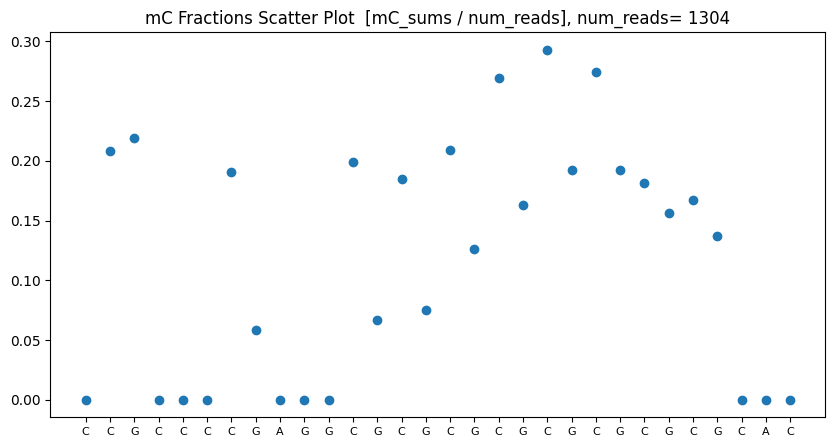

(mC_sums / len(CGs_all) = [0.         0.20858896 0.21932515 0.         0.         0.
 0.19095092 0.05828221 0.         0.         0.         0.19861963
 0.06671779 0.18481595 0.07515337 0.20935583 0.12653374 0.26917178
 0.16334356 0.29294479 0.19248466 0.27453988 0.19248466 0.18174847
 0.15644172 0.16717791 0.13726994 0.         0.         0.        ]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence   mC Sums
0       0                  C  0.000000
1       1                  C  0.208589
2       2                  G  0.219325
3       3                  C  0.000000
4       4                  C  0.000000
5       5                  C  0.000000
6       6                  C  0.190951
7       7                  G  0.058282
8       8                  A  0.000000
9       9                  G  0.000000
10     10                  G  0.0000

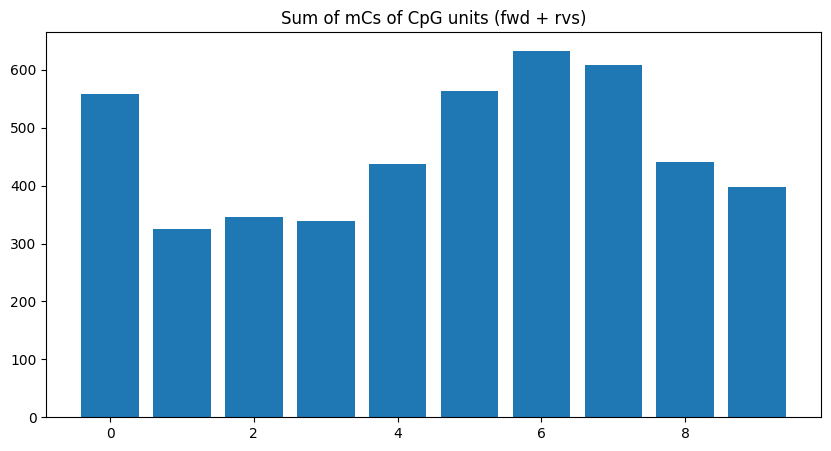

CGs_all_sums  = [558. 325. 346. 339. 438. 564. 633. 609. 441. 397.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (10, 3)
In plot_mC_sums_bar DataFrame:    Index Reference Sequence  mC Sums
0      0               CG_1    558.0
1      1               CG_2    325.0
2      2               CG_3    346.0
3      3               CG_4    339.0
4      4               CG_5    438.0
5      5               CG_6    564.0
6      6               CG_7    633.0
7      7               CG_8    609.0
8      8               CG_9    441.0
9      9              CG_10    397.0
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


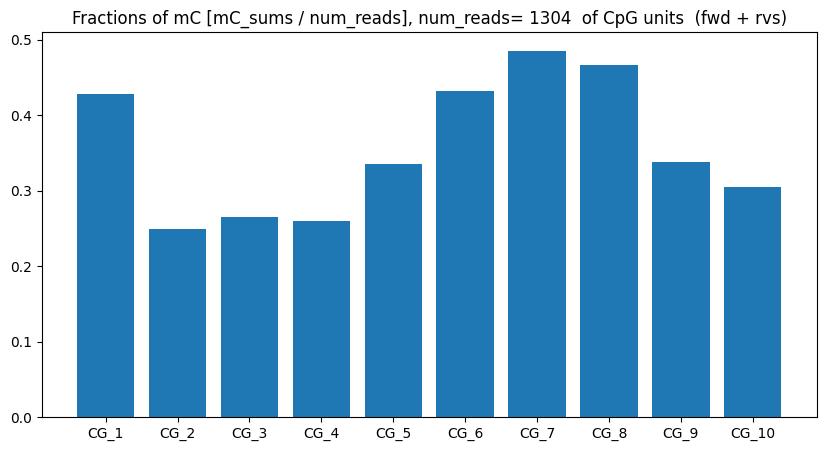

CGs_all_sums / len(CGs_all) = [0.42791411 0.24923313 0.26533742 0.25996933 0.33588957 0.43251534
 0.48542945 0.46702454 0.33819018 0.30444785]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (10, 3)
In plot_mC_sums_bar DataFrame:    Index Reference Sequence   mC Sums
0      0               CG_1  0.427914
1      1               CG_2  0.249233
2      2               CG_3  0.265337
3      3               CG_4  0.259969
4      4               CG_5  0.335890
5      5               CG_6  0.432515
6      6               CG_7  0.485429
7      7               CG_8  0.467025
8      8               CG_9  0.338190
9      9              CG_10  0.304448
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


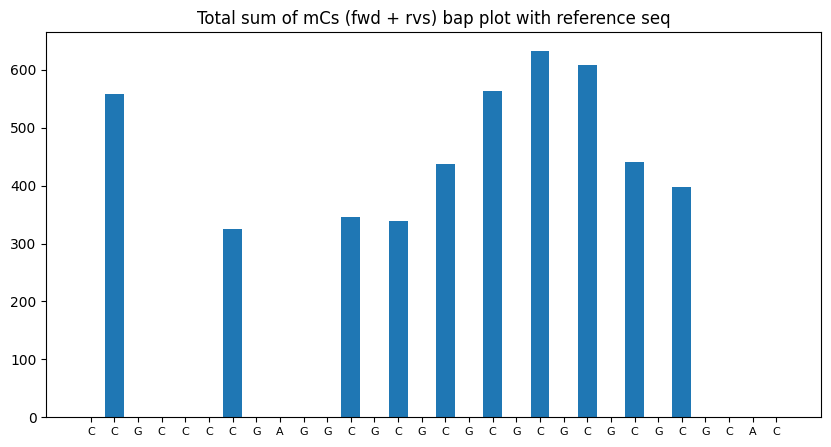

CGs_all_on_fwd_C_sums = [  0. 558.   0.   0.   0.   0. 325.   0.   0.   0.   0. 346.   0. 339.
   0. 438.   0. 564.   0. 633.   0. 609.   0. 441.   0. 397.   0.   0.
   0.   0.]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence  mC Sums
0       0                  C      0.0
1       1                  C    558.0
2       2                  G      0.0
3       3                  C      0.0
4       4                  C      0.0
5       5                  C      0.0
6       6                  C    325.0
7       7                  G      0.0
8       8                  A      0.0
9       9                  G      0.0
10     10                  G      0.0
11     11                  C    346.0
12     12                  G      0.0
13     13                  C    339.0
14     14                  G      0.0
15     15                  C    4

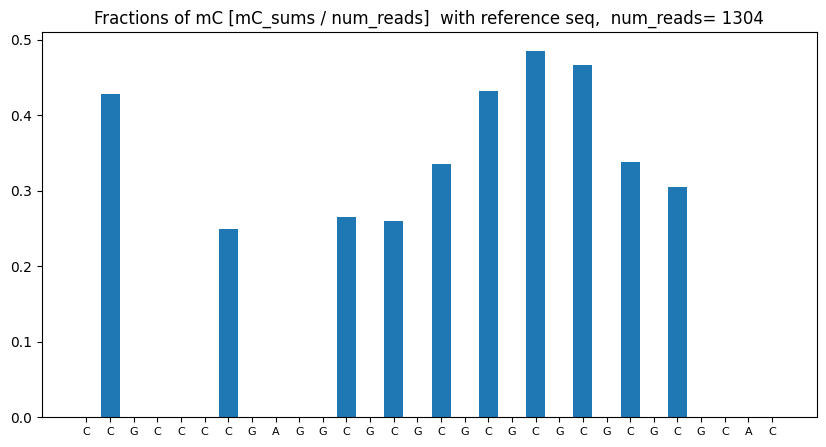

CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.42791411 0.         0.         0.         0.
 0.24923313 0.         0.         0.         0.         0.26533742
 0.         0.25996933 0.         0.33588957 0.         0.43251534
 0.         0.48542945 0.         0.46702454 0.         0.33819018
 0.         0.30444785 0.         0.         0.         0.        ]
In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (30, 3)
In plot_mC_sums_bar DataFrame:     Index Reference Sequence   mC Sums
0       0                  C  0.000000
1       1                  C  0.427914
2       2                  G  0.000000
3       3                  C  0.000000
4       4                  C  0.000000
5       5                  C  0.000000
6       6                  C  0.249233
7       7                  G  0.000000
8       8                  A  0.000000
9       9                  G  0.000000
10     10              

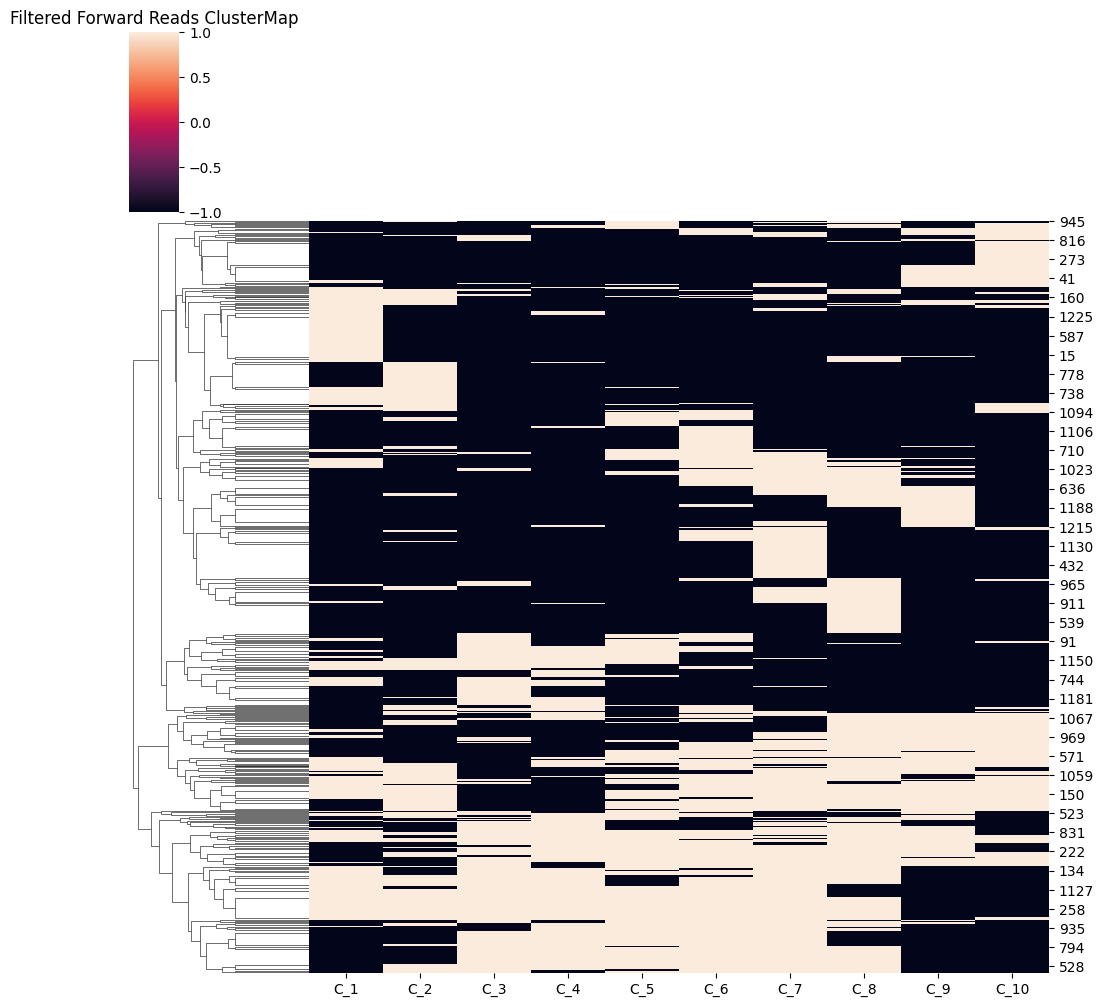

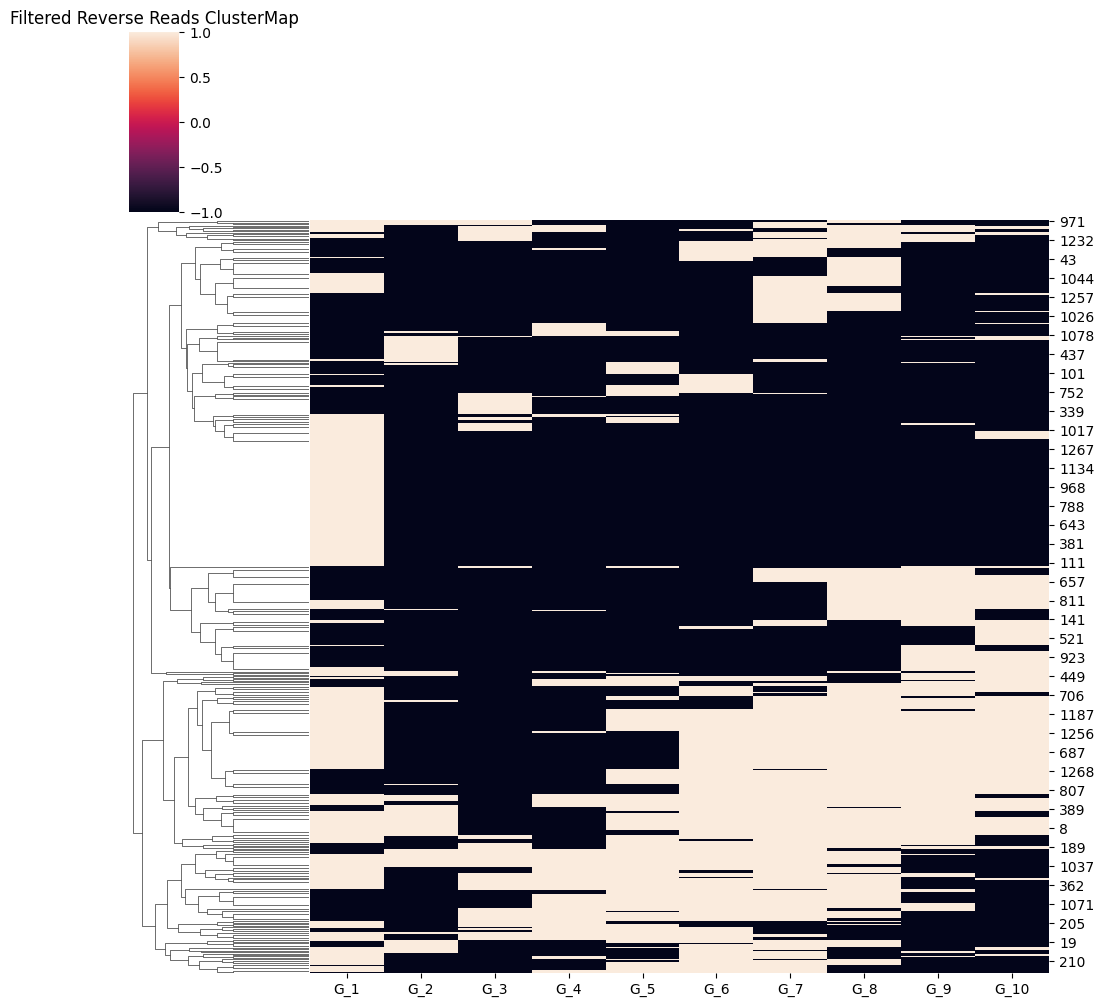

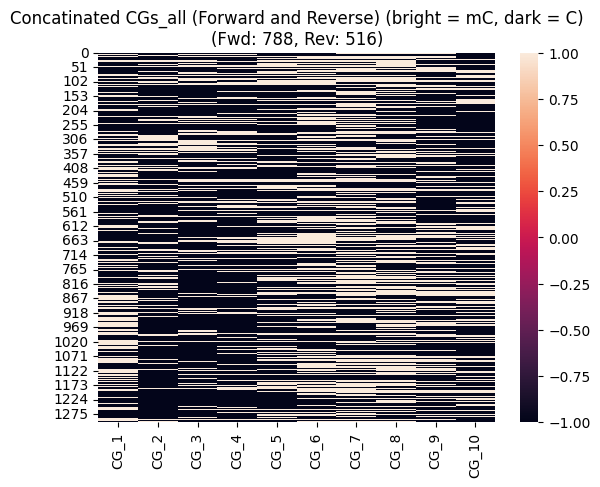

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



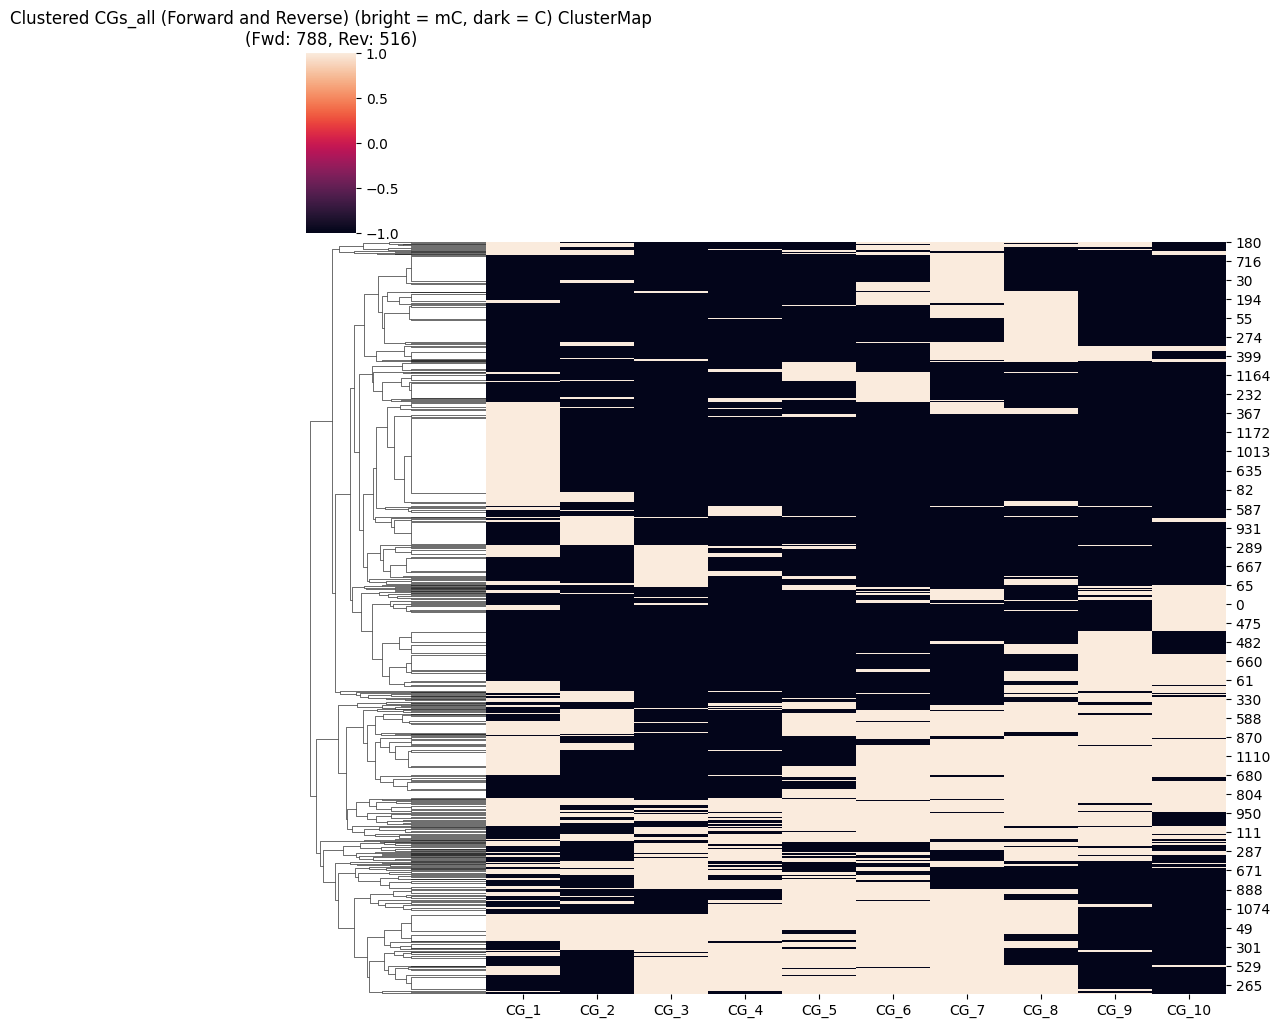

CGs_all saved as CG_10_units_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [11]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around ~3000 reads located near the ROI, 

only ~1300 reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads: 788

Reverse reads: 516 

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

In [12]:
system_info()

experiment_name = "silenced_T_primerES_nCATS"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

Error! refusing to write over existing file "dimelo_v2_output/extracted_reads/reads.CG,0.txt"

Error in BAM extraction: Command '['modkit', 'extract', PosixPath('/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'), PosixPath('dimelo_v2_output/extracted_reads/reads.CG,0.txt'), '--include-bed', 'dimelo_v2_output/extracted_reads/regions.processed.bed', '--motif', 'CG', '0', '--threads', '24', '--ref', PosixPath('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta'), '--filter-threshold', '0']' returned non-zero exit status 1.


In [13]:
save_padded_reads_name_np

'padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy'

In [14]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


Error loading padded reads: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy'
Error in process pipeline: [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy'
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): [Errno 2] No such file or directory: 'dimelo_v2_output/padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-25.npy'


### ROI Extraction Results from  Silenced CRISPROff primary T cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads: 3852

Reverse reads: 2805 


In comparison to the 70% condidance reads:

Forward reads: 4132

Reverse reads: 2965


~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds
- try extanding to londer regions than my 30 bps [Done!]
